In [1]:
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import os

# Define the power curve
power_curve = [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 250.0), (5.0, 613.0), (6.0, 1226.0), (7.0, 2030.0), (8.0, 3123.0), (9.0, 4444.0), (10.0, 5900.0), (11.0, 7300.0), (12.0, 8600.0), (13.0, 9272.0), (14.0, 9500.0), (15.0, 9500.0), (16.0, 9500.0), (17.0, 9500.0), (18.0, 9500.0), (19.0, 9500.0), (20.0, 9500.0), (21.0, 9500.0), (22.0, 9500.0), (23.0, 9500.0), (24.0, 9500.0), (25.0, 9500.0)]
speed, power = np.array([pc[0] for pc in power_curve]), np.array([pc[1] for pc in power_curve])

# Create an interpolation function based on the power curve
f = interp1d(speed, power, kind='cubic', fill_value="extrapolate")

# Function to calculate power output from wind speed using the power curve
def calculate_power_output(wind_speed):
    # Ensure wind speed is within the curve's limits
    if wind_speed > max(speed):
        return 0.0
    elif wind_speed < min(speed):
        return 0.0
    else:
        return f(wind_speed)

# Define the input and output directories
input_dir = '../../data/wind'
output_dir = os.path.join(input_dir, 'load_factor')
os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

def calculate_power_output(wind_speed):
    try:
        # Convert wind_speed to float to ensure numeric operations can be performed
        wind_speed = float(wind_speed)
    except ValueError:
        # If conversion fails, return 0.0 as the power output
        return 0.0
    
    # Proceed with checking against the power curve's limits
    if wind_speed > max(speed):
        return 0.0
    elif wind_speed < min(speed):
        return 0.0
    else:
        return f(wind_speed)

# When processing each CSV file:
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)

        # Ensure '100m' column is treated as numeric. Attempt to convert non-numeric to NaN, then fill with 0
        df['100m'] = pd.to_numeric(df['100m'], errors='coerce').fillna(0)

        # Calculate power output for the wind speed at 100m, then normalize to get the load factor
        df['load_factor'] = df['100m'].apply(calculate_power_output) / 9500.0
        df['load_factor'] = np.clip(df['load_factor'], 0, 1)  # Ensure load factor is between 0 and 1

        # Prepare the DataFrame for output
        output_df = df[['YYY', 'MM', 'DD', 'HH', 'NAME', 'stLON', 'stLAT', 'MARlon', 'MARlat', '100m', 'load_factor']]

        # Construct the output file path and write to CSV
        output_file_path = os.path.join(output_dir, os.path.splitext(filename)[0] + '_lf.csv')
        output_df.to_csv(output_file_path, index=False)

print("All files processed. Load factor CSV files are saved in the 'load_factor' directory.")

All files processed. Load factor CSV files are saved in the 'load_factor' directory.


In [3]:
import pandas as pd
import os

# Define the directory where the load factor files are stored
load_factor_dir = '../../data/wind/load_factor'

# Initialize a dictionary to store the average load factor for each location
average_load_factors = {}

# Loop over each load factor CSV file in the directory
for filename in os.listdir(load_factor_dir):
    if filename.endswith('_lf.csv'):
        # Extract the location name from the filename (assuming the format is 'locationname_lf.csv')
        location_name = filename.replace('_lf.csv', '')
        
        # Construct the full path to the file
        file_path = os.path.join(load_factor_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Calculate the average load factor for this location
        average_load_factor = df['load_factor'].mean()
        
        # Store the average load factor in the dictionary
        average_load_factors[location_name] = average_load_factor

# Convert the dictionary to a DataFrame for easier sorting and manipulation
locations_df = pd.DataFrame(list(average_load_factors.items()), columns=['Location', 'Average Load Factor'])

# Sort the DataFrame by 'Average Load Factor' in descending order to rank the locations
ranked_locations = locations_df.sort_values(by='Average Load Factor', ascending=False).reset_index(drop=True)

# Print the ranked locations
print(ranked_locations)

     Location  Average Load Factor
0   offshore3             0.577632
1  AWS_0680_2             0.533469
2   offshore2             0.472009
3    AWS_6640             0.455418
4    AWS_0460             0.340911
5  AWS_0680_1             0.329938
6   offshore1             0.282855


In [13]:
import pandas as pd
import os

# Define the directory where the load factor files are stored
load_factor_dir = '../../data/wind/load_factor'

# Loop over each load factor CSV file in the directory
for filename in os.listdir(load_factor_dir):
    if filename.endswith('_lf.csv'):
        # Extract the location name from the filename (assuming the format is 'locationname_lf.csv')
        location_name = filename.replace('_lf.csv', '')
        
        # Construct the full path to the file
        file_path = os.path.join(load_factor_dir, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        print(f'Analyzing data in: {filename}')
        print(df['100m'].describe())
        print('\n')
        print(df['load_factor'].describe())
        print('\n\n')

Analyzing data in: AWS_0460_lf.csv
count    43824.000000
mean        10.200552
std          8.997129
min          0.090000
25%          3.520000
50%          7.210000
75%         14.130000
max         54.380000
Name: 100m, dtype: float64


count    43824.000000
mean         0.340911
std          0.401846
min          0.000000
25%          0.001501
50%          0.112978
75%          0.747747
max          1.000000
Name: load_factor, dtype: float64



Analyzing data in: AWS_0680_1_lf.csv
count    43824.000000
mean        11.963908
std         10.692357
min          0.040000
25%          3.120000
50%          8.120000
75%         18.920000
max         58.040000
Name: 100m, dtype: float64


count    43824.000000
mean         0.329938
std          0.421086
min          0.000000
25%          0.000000
50%          0.039269
75%          0.865207
max          1.000000
Name: load_factor, dtype: float64



Analyzing data in: AWS_0680_2_lf.csv
count    43824.000000
mean        10.772695
std        

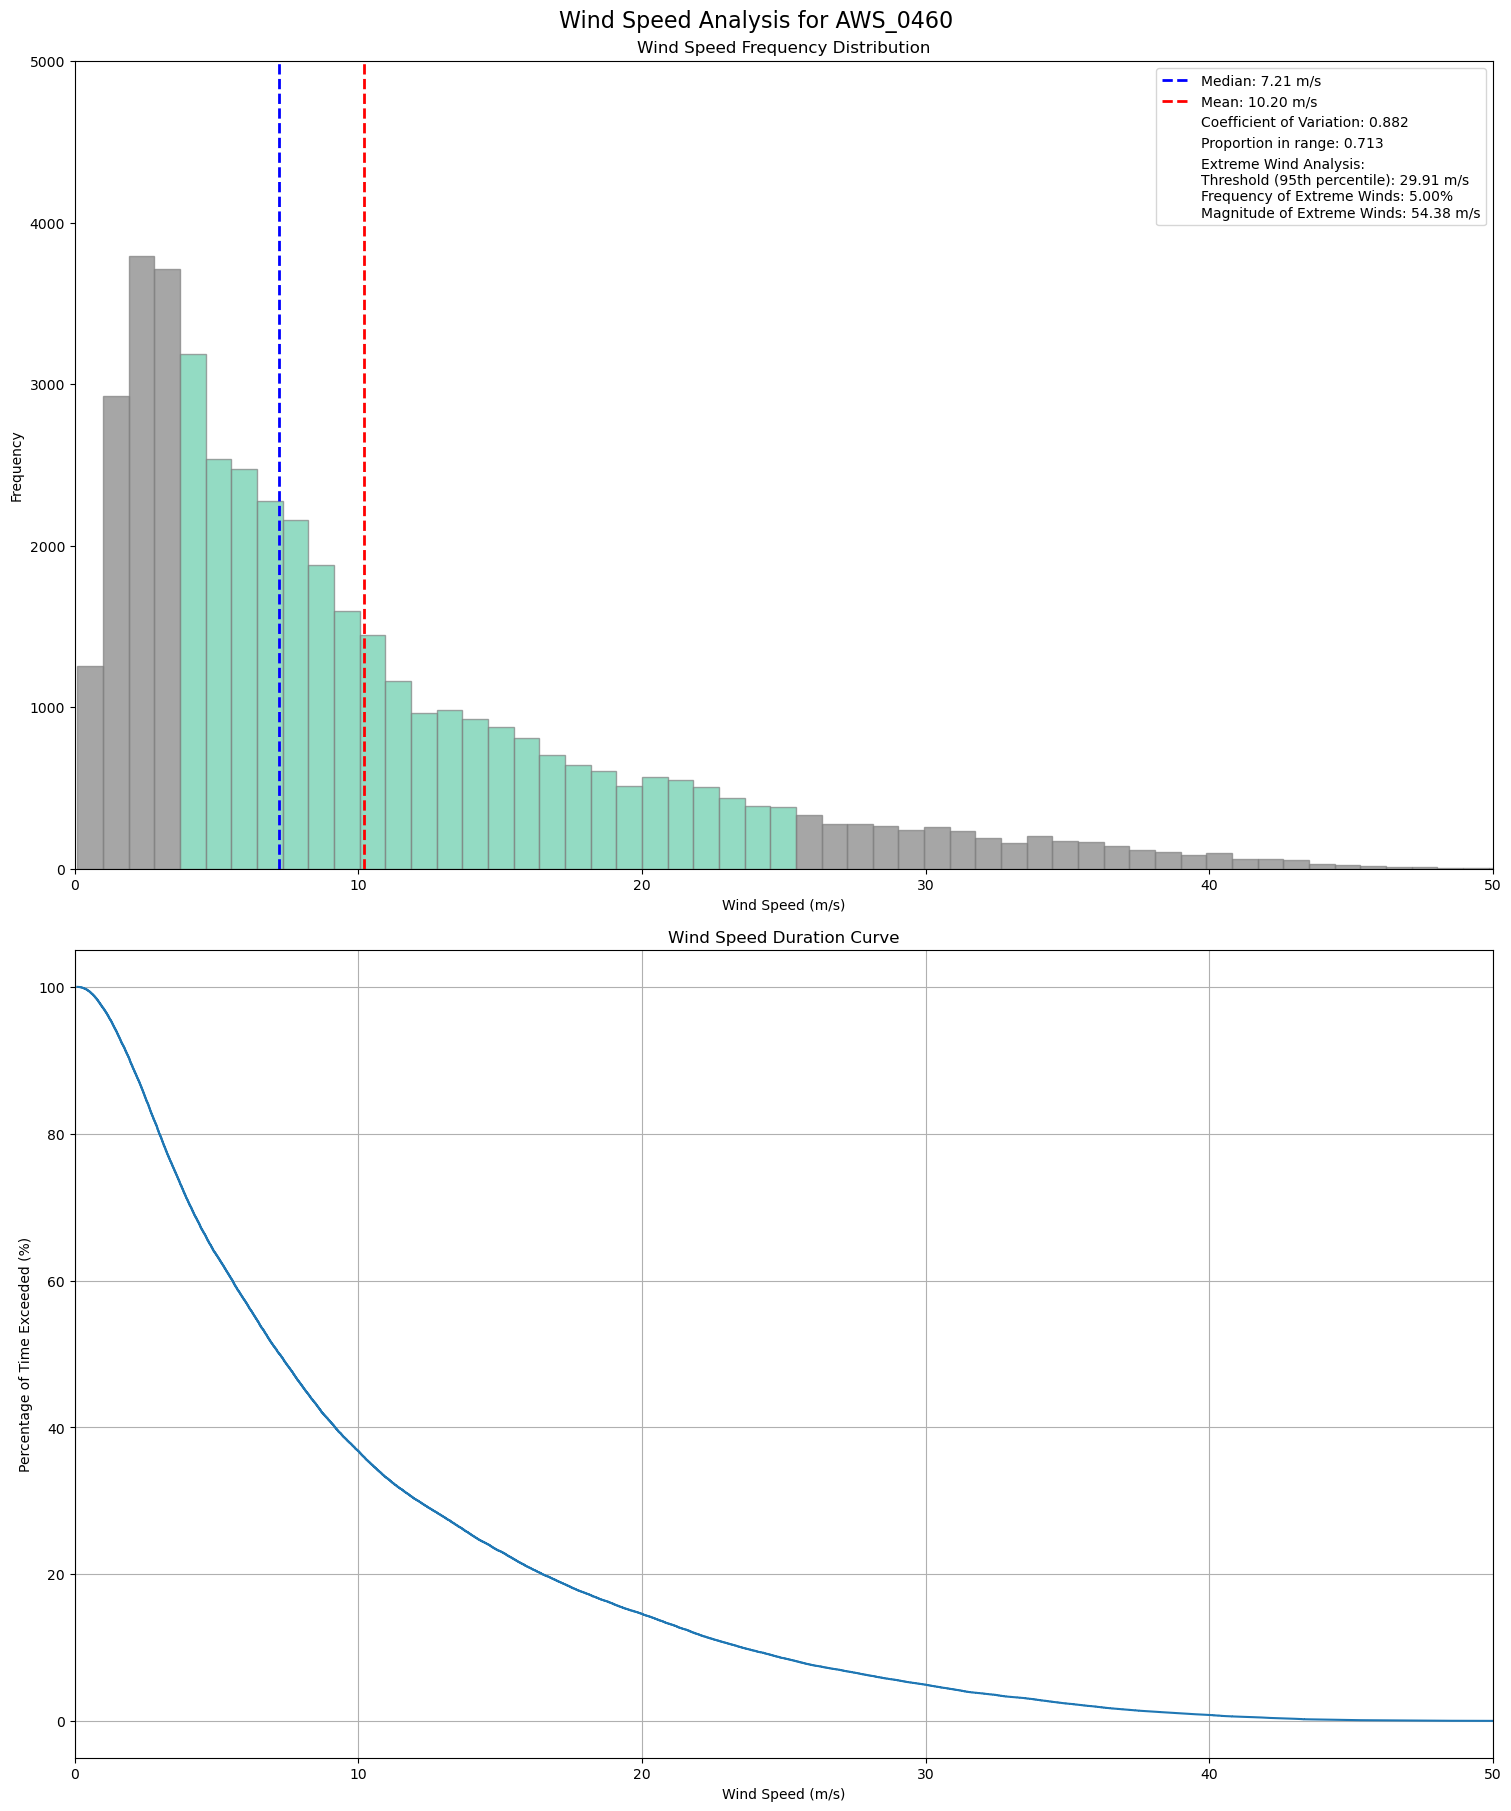

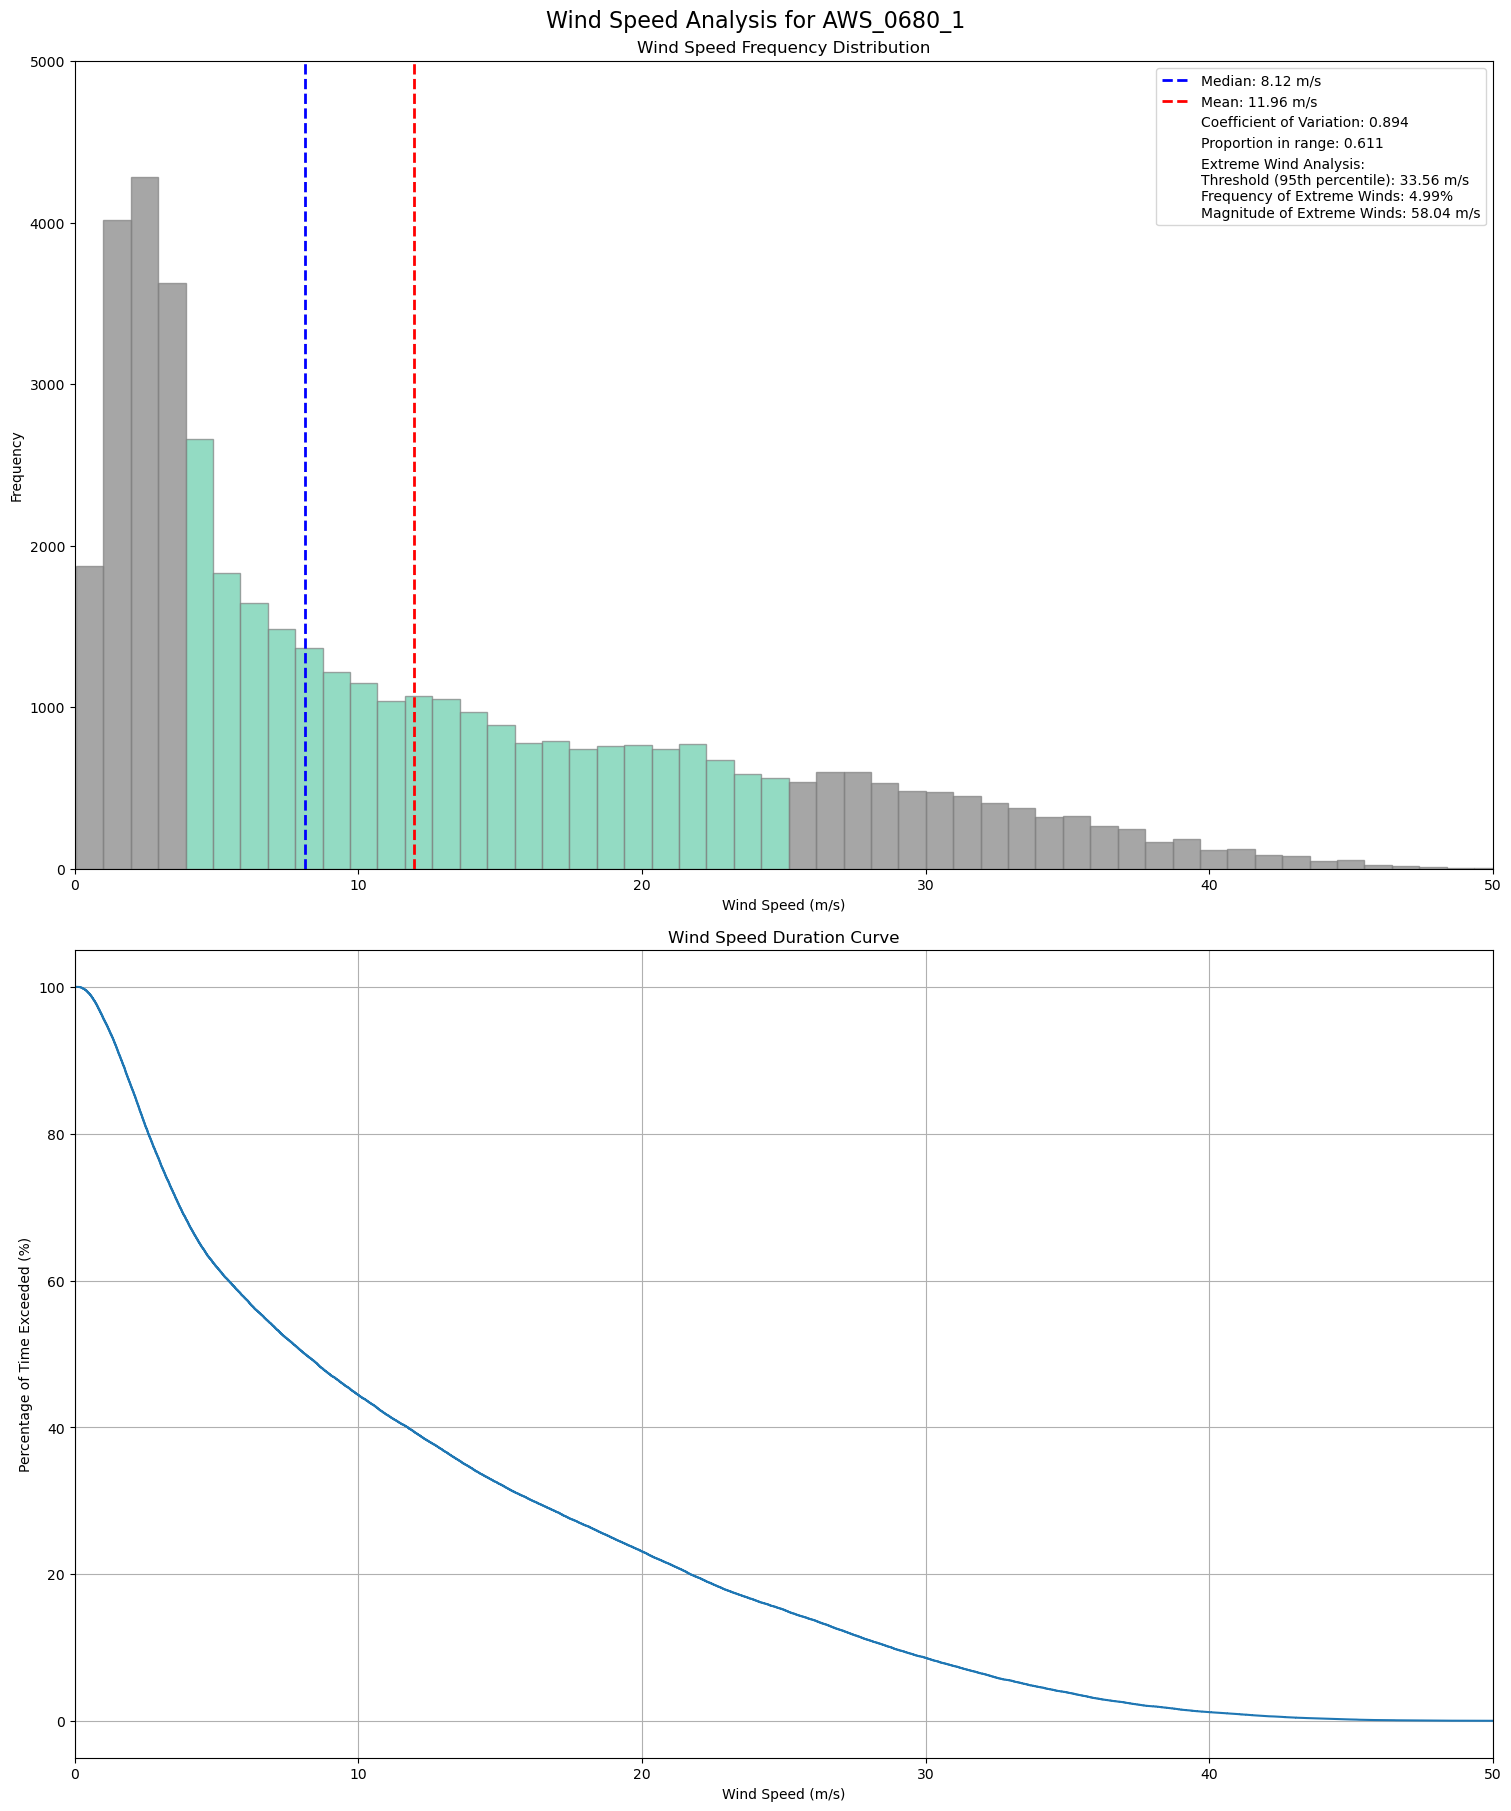

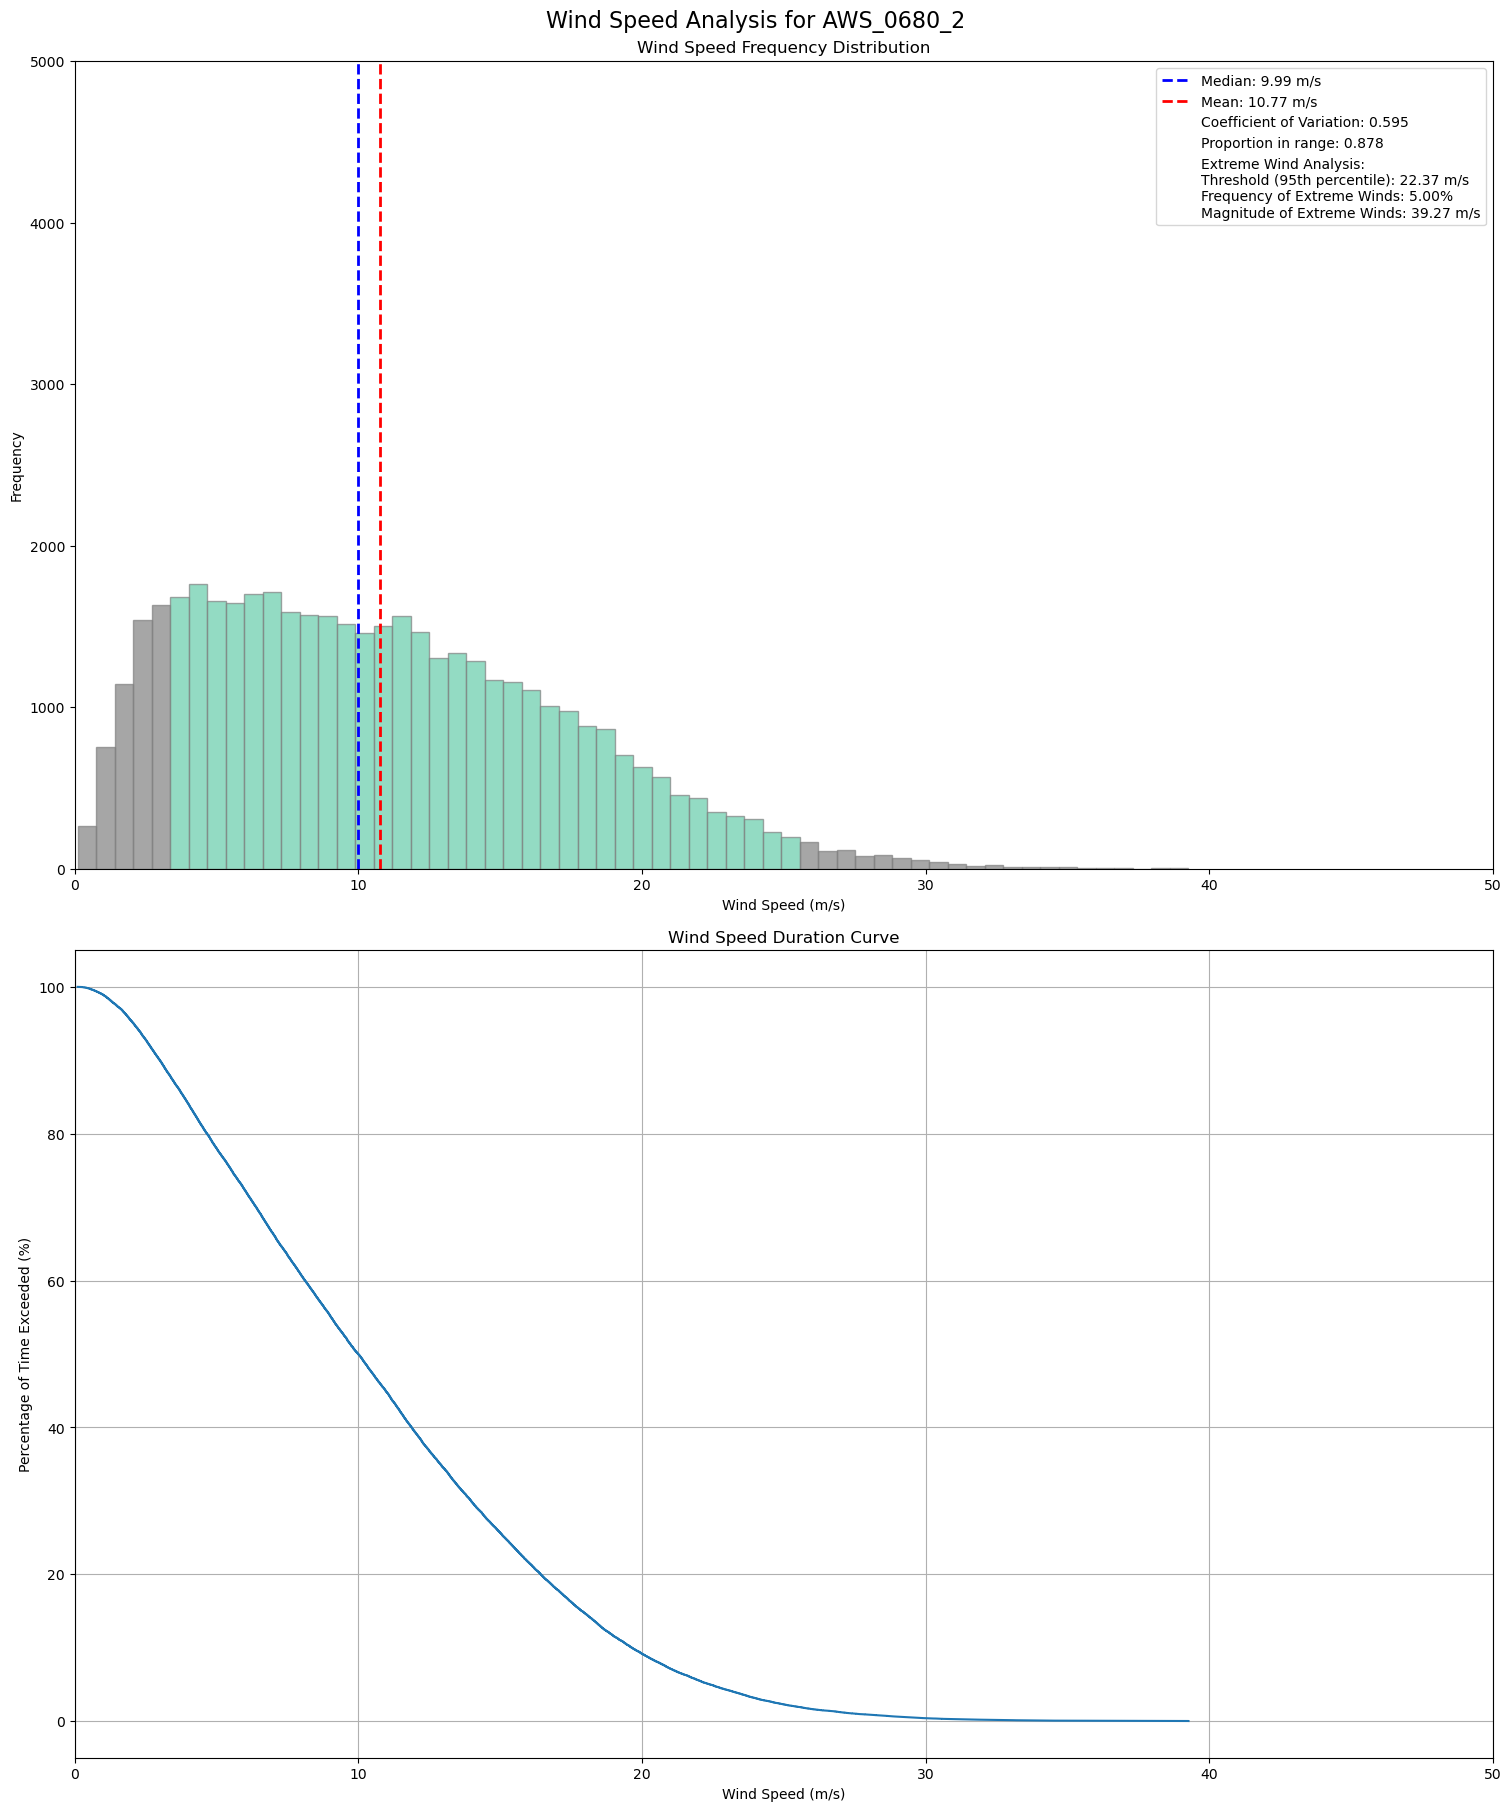

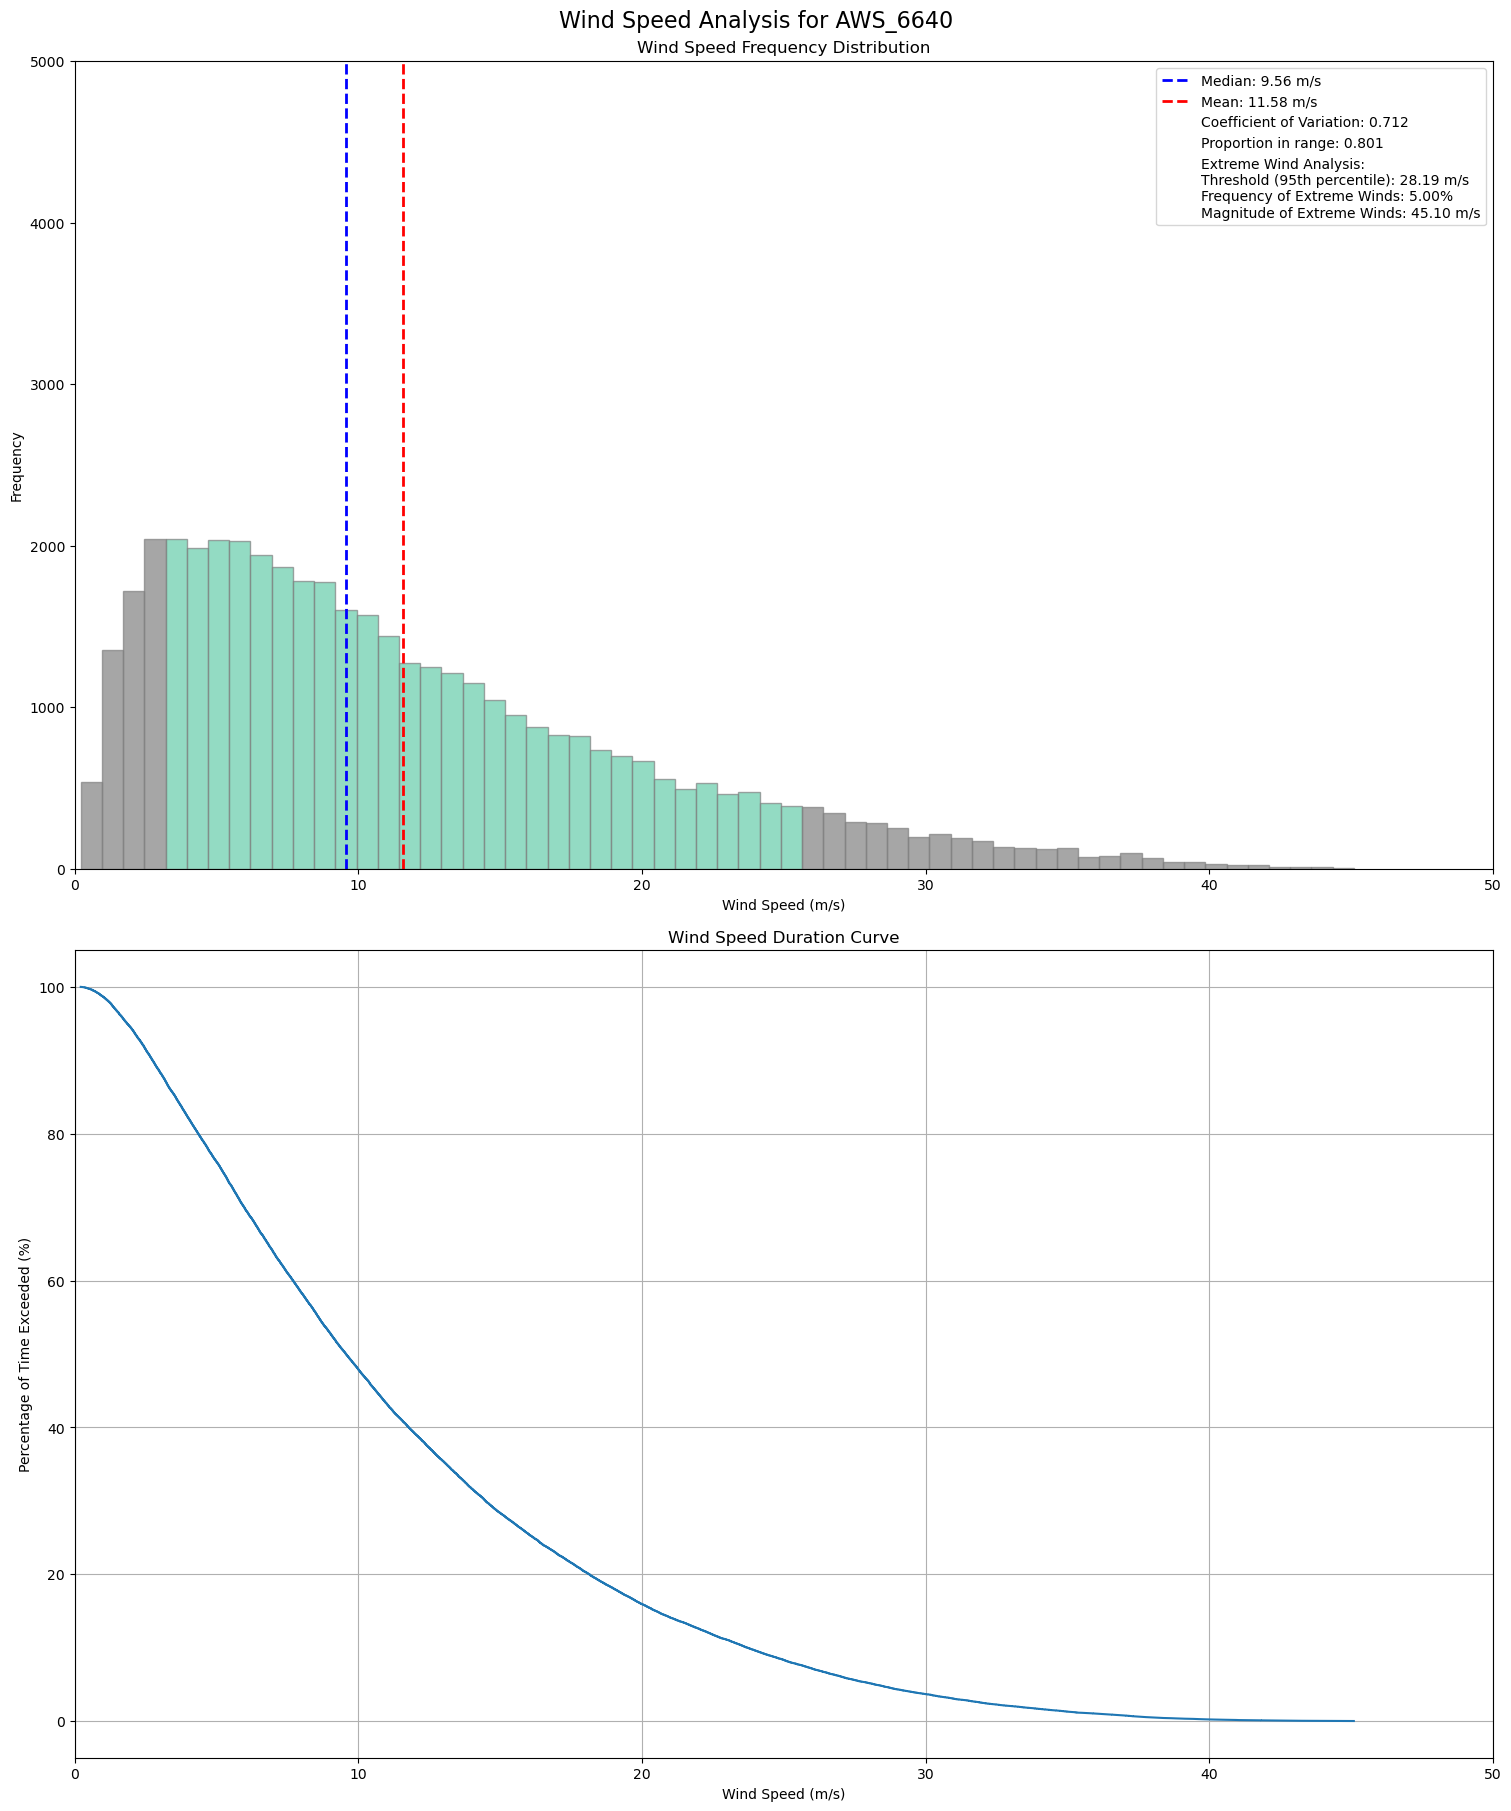

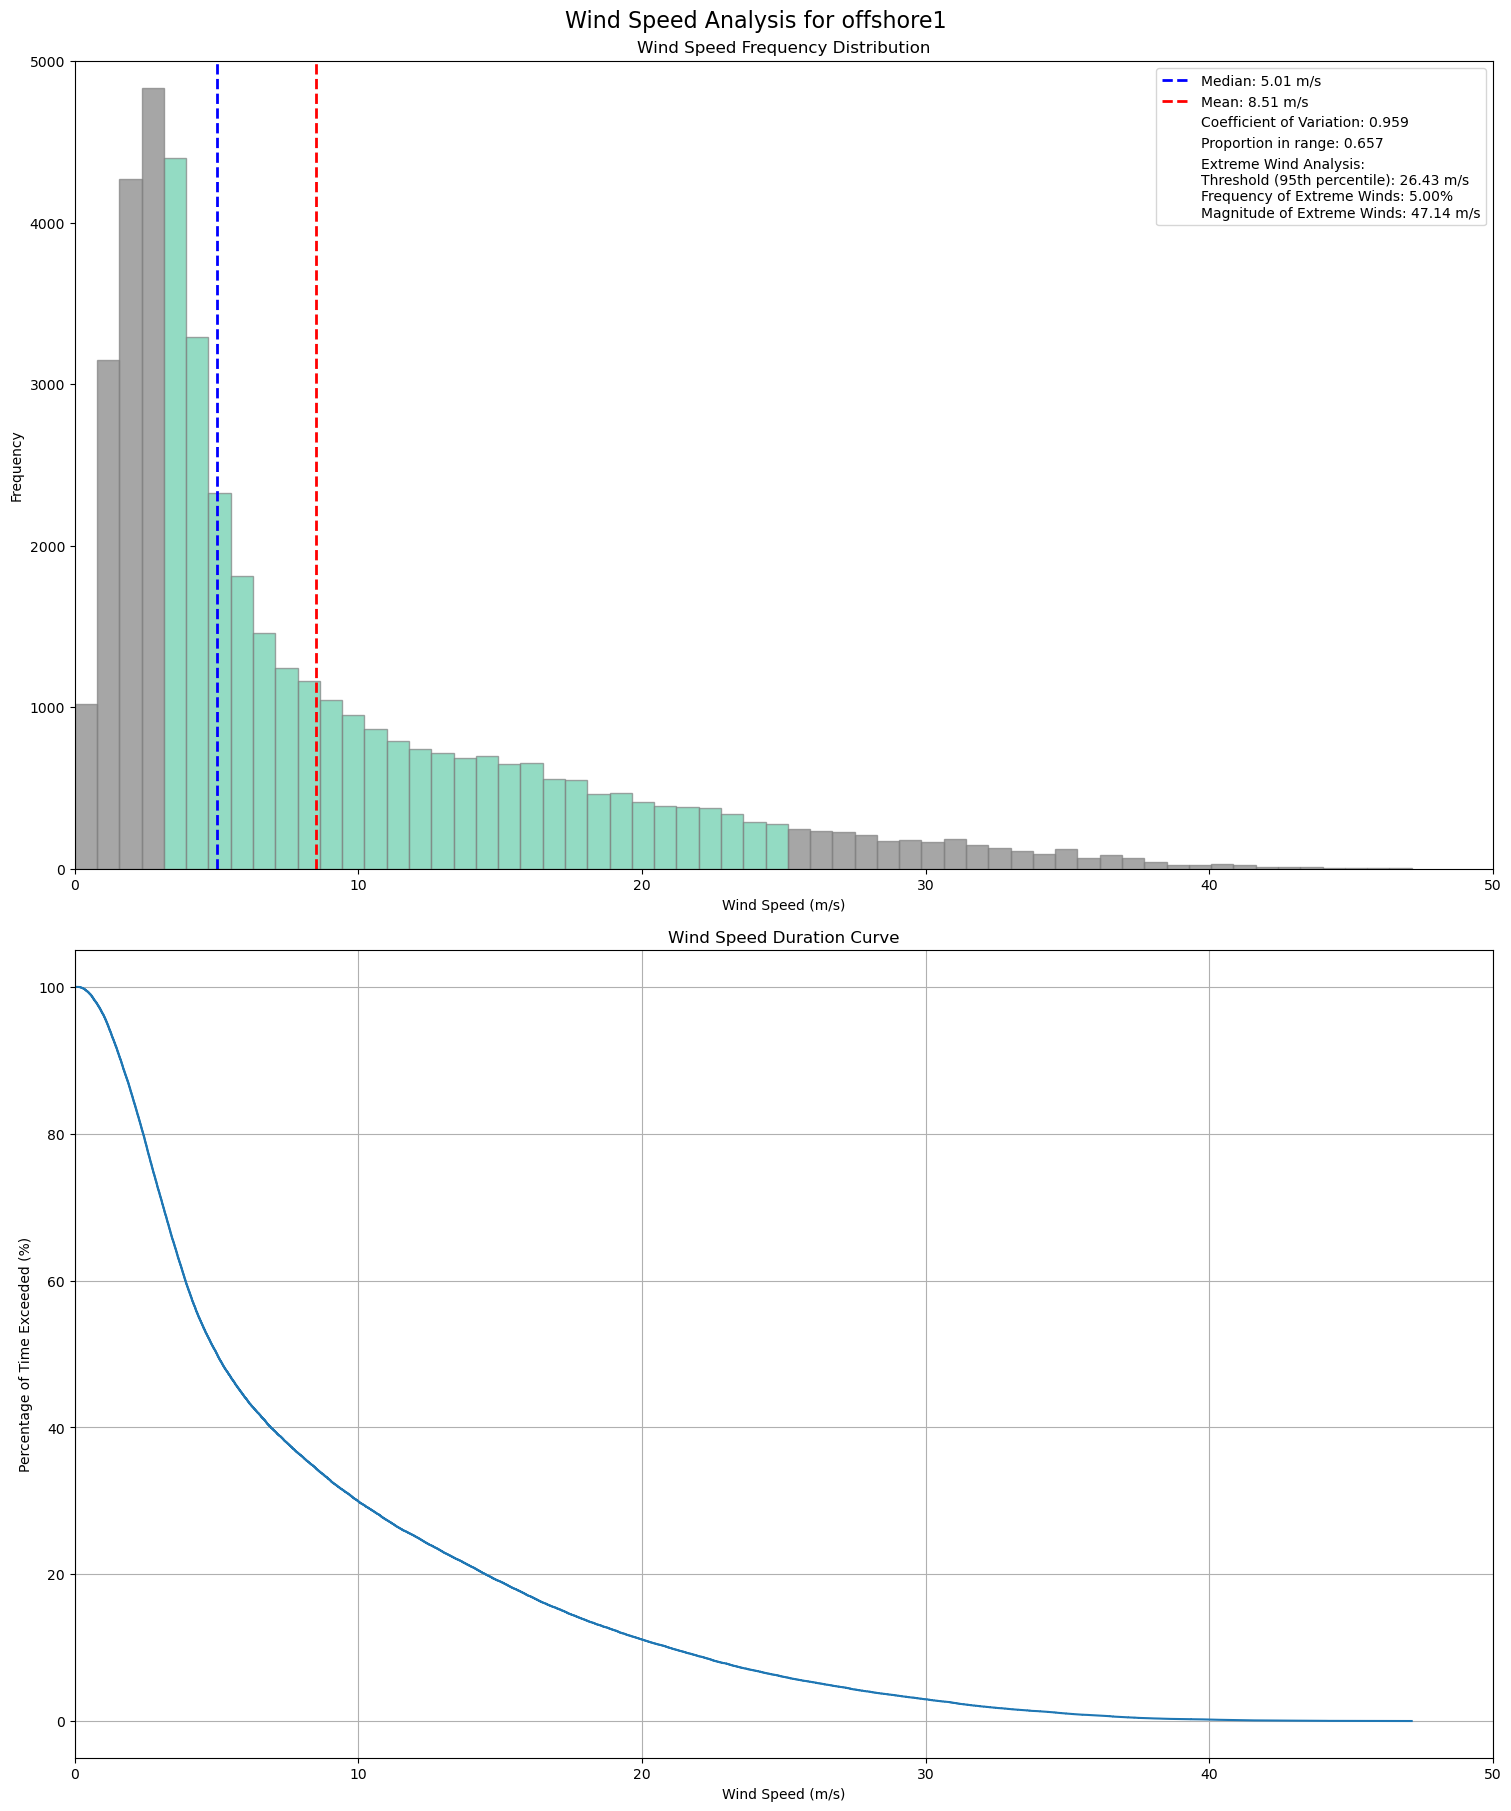

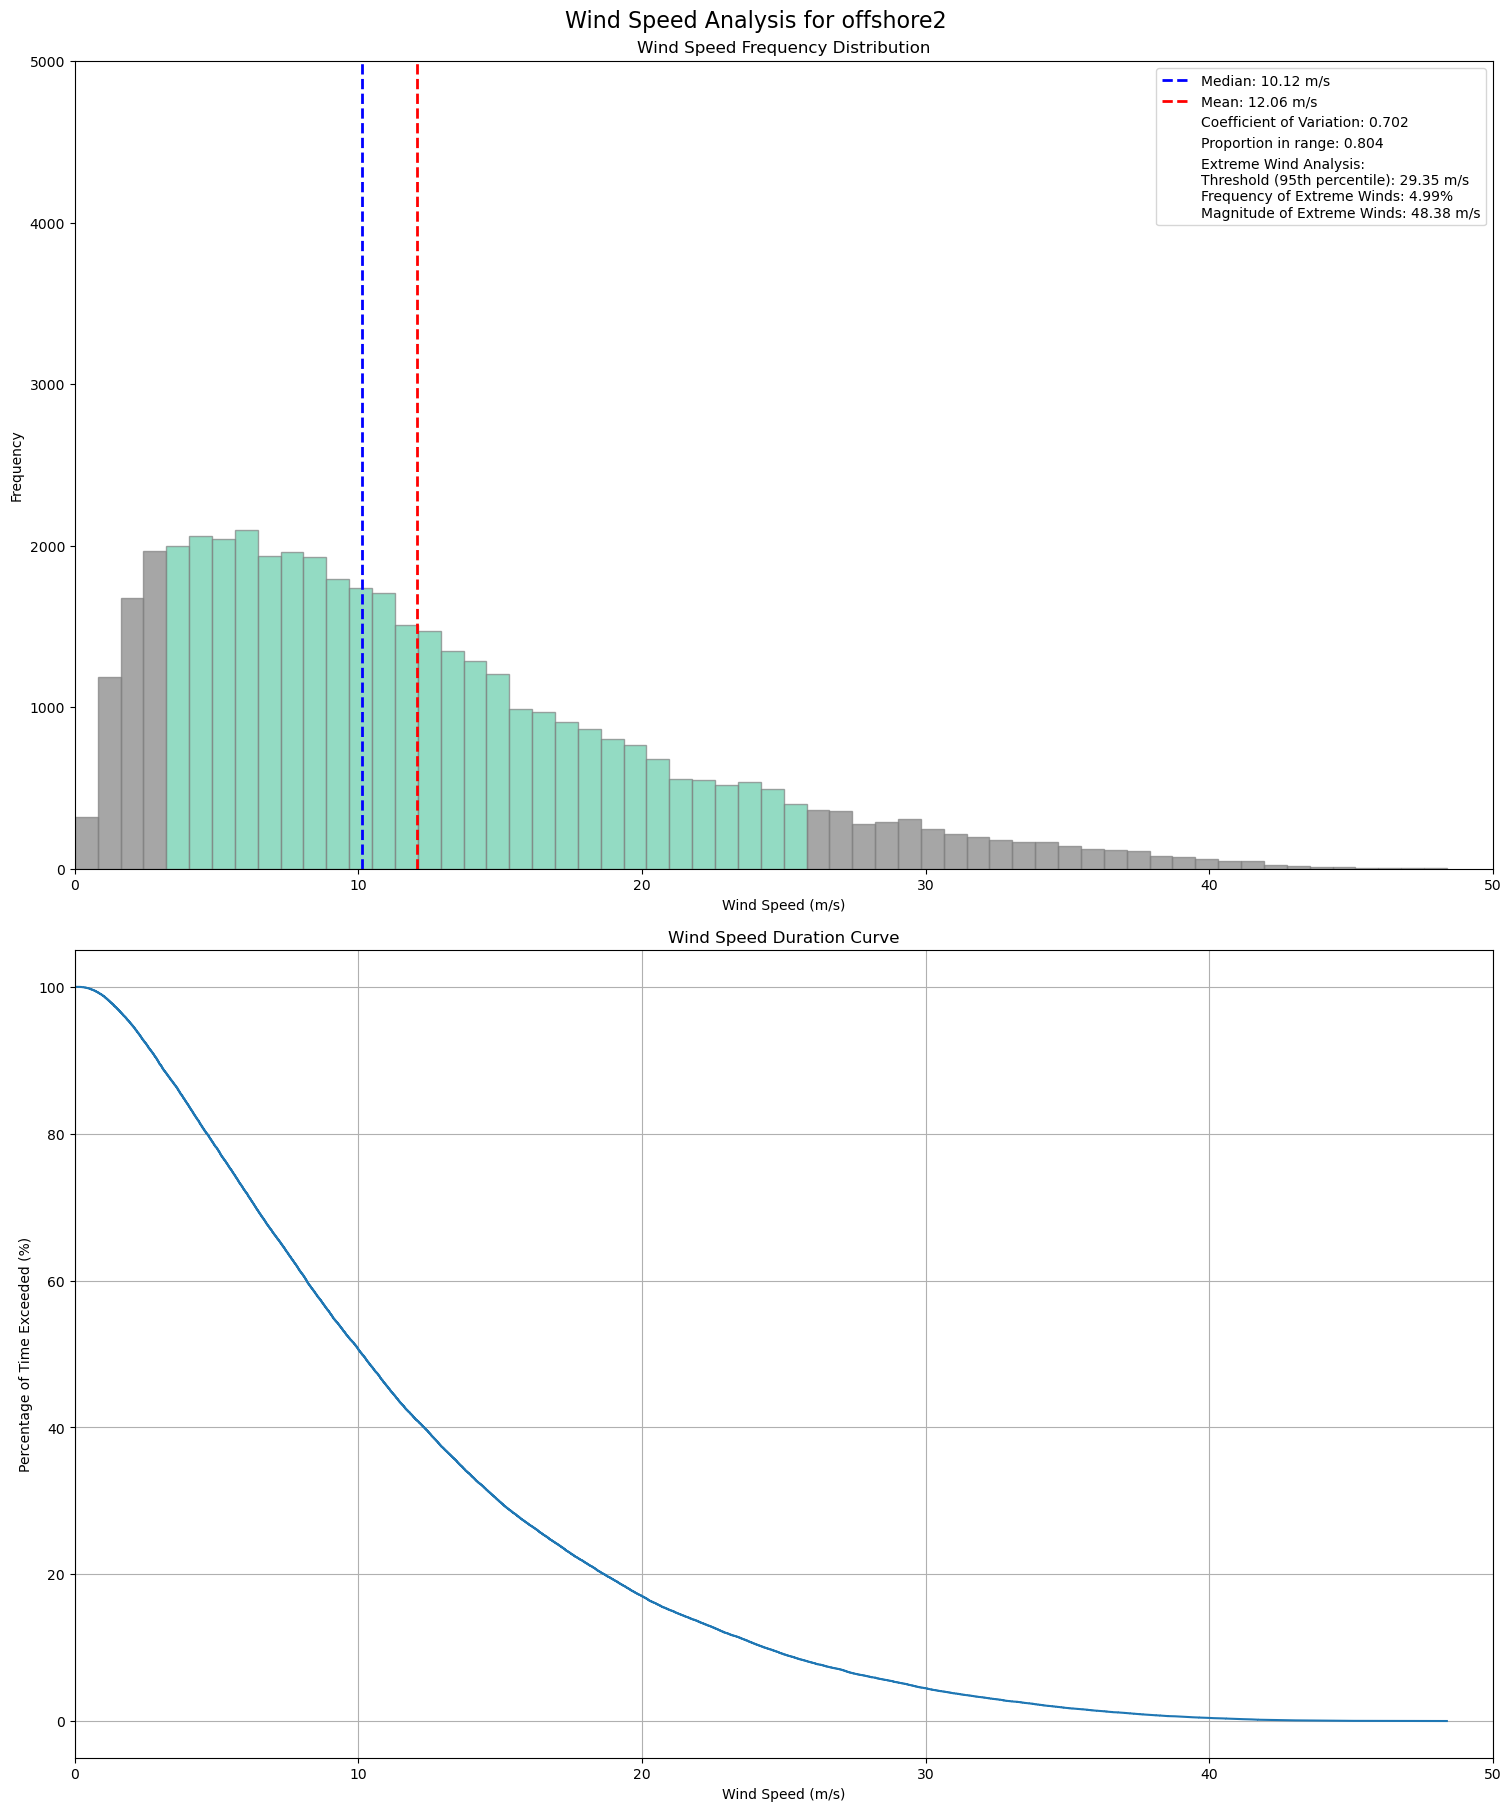

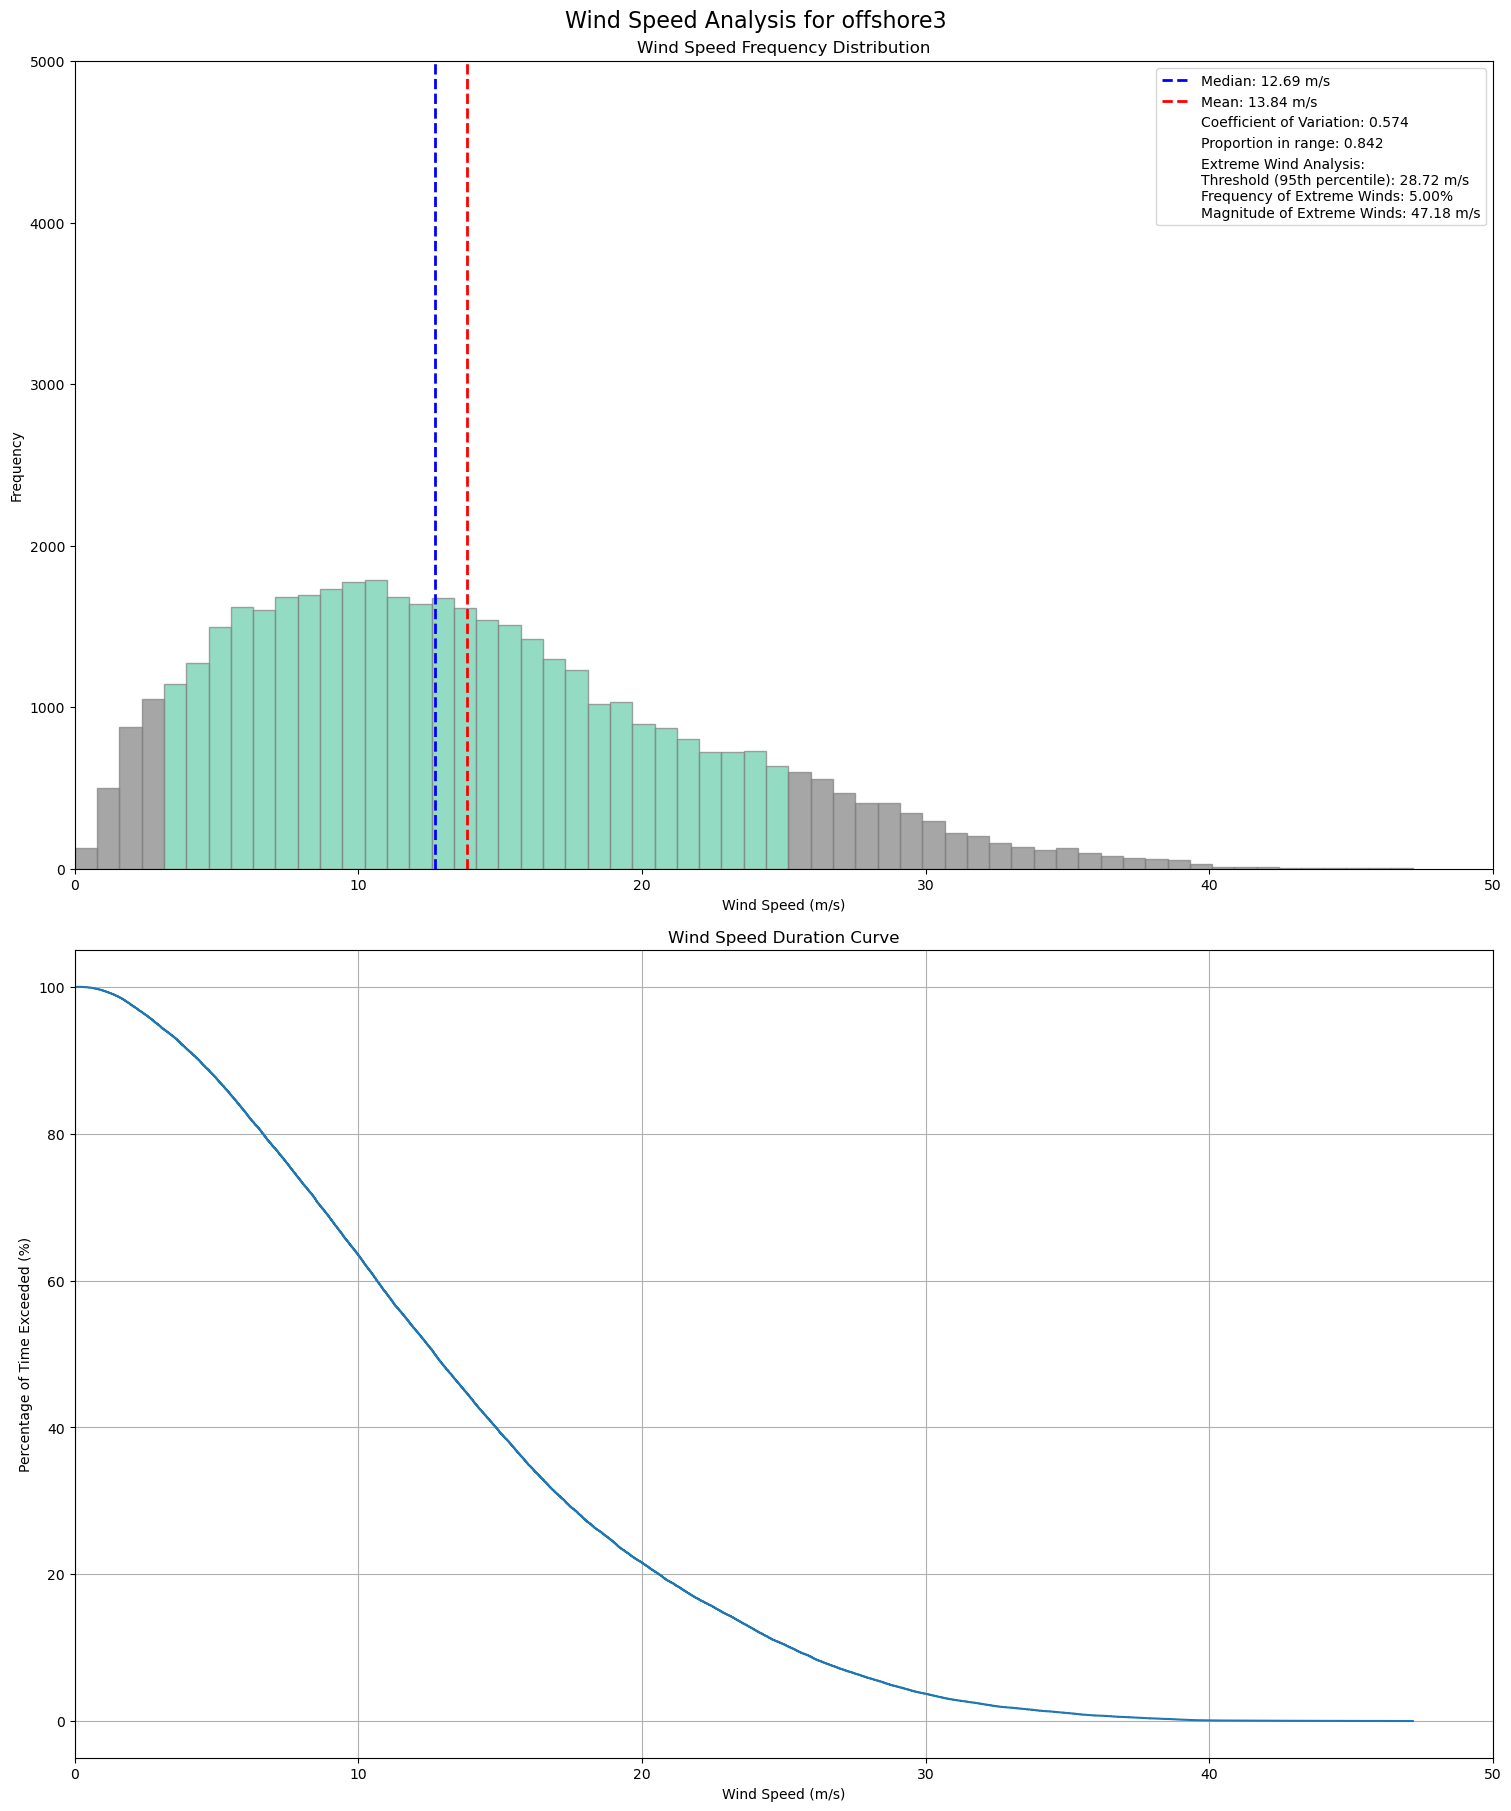

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define the directory where the CSV files are stored
input_dir = '../../data/wind/load_factor'

# Function to calculate the Coefficient of Variation
def calculate_cv(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return std_dev / mean if mean else 0

# Function to plot the Wind Speed Frequency Distribution
def plot_windspeed_distribution(data, ax, color_thresholds=(3, 25), bins=60):
    median_windspeed = np.median(data)
    mean_windspeed = np.mean(data)
    cv = calculate_cv(data)
    hours_in_range = ((data >= color_thresholds[0]) & (data <= color_thresholds[1])).sum()
    proportion_in_range = hours_in_range / len(data)
    extreme_threshold = np.percentile(data, 95)  # 95th percentile as the threshold
    extreme_wind_speeds = data[data > extreme_threshold]
    frequency_of_extreme_winds = len(extreme_wind_speeds) / len(data)
    magnitude_of_extreme_winds = np.max(extreme_wind_speeds)

    # Plot the histogram
    counts, bins, patches = ax.hist(data, bins=bins, color='mediumaquamarine', alpha=0.7, edgecolor='grey')

    # Color the bars outside the color_thresholds range in grey
    for bin, patch in zip(bins, patches):
        if bin < color_thresholds[0] or bin > color_thresholds[1]:
            patch.set_color('grey')

    # Add lines for median and mean
    ax.axvline(median_windspeed, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_windspeed:.2f} m/s')
    ax.axvline(mean_windspeed, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_windspeed:.2f} m/s')

    # Prepare custom legend entries
    cv_patch = mpatches.Patch(color='none', label=f'Coefficient of Variation: {cv:.3f}', alpha=0)
    prop_patch = mpatches.Patch(color='none', label=f'Proportion in range: {proportion_in_range:.3f}', alpha=0)
    extreme_wind_patch = mpatches.Patch(color='none', label=f'Extreme Wind Analysis:\nThreshold (95th percentile): {extreme_threshold:.2f} m/s\nFrequency of Extreme Winds: {frequency_of_extreme_winds:.2%}\nMagnitude of Extreme Winds: {magnitude_of_extreme_winds:.2f} m/s', alpha=0)

    # Add all legend entries
    handles, labels = ax.get_legend_handles_labels()
    handles.extend([cv_patch, prop_patch, extreme_wind_patch])
    ax.legend(handles=handles, loc='upper right')

    ax.set_title('Wind Speed Frequency Distribution')
    ax.set_xlabel('Wind Speed (m/s)')
    ax.set_ylabel('Frequency')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 5000)

# Function to plot the Wind Speed Duration Curve
def plot_duration_curve(data, ax):
    sorted_data = np.sort(data)[::-1]
    ax.plot(sorted_data, np.linspace(0, 100, sorted_data.size))
    ax.set_title('Wind Speed Duration Curve')
    ax.set_xlabel('Wind Speed (m/s)')
    ax.set_ylabel('Percentage of Time Exceeded (%)')
    ax.grid(True)
    ax.set_xlim(0, 50)


# Loop over each CSV file and create the combined plot layout
for csv_file in os.listdir(input_dir):
    if csv_file.endswith('_lf.csv'):
        df = pd.read_csv(os.path.join(input_dir, csv_file))
        wind_speed_data = df['100m'].dropna().values  # Remove any NaN values
        location_name = csv_file.replace('_lf.csv', '')

        # Set up the figure and subplots
        fig, axs = plt.subplots(2, 1, figsize=(15, 18), constrained_layout=True)
        fig.suptitle(f'Wind Speed Analysis for {location_name}', fontsize=16)

        # Plot frequency distribution with the additional information included in the legend
        plot_windspeed_distribution(wind_speed_data, axs[0], bins=60)

        # Plot the Duration Curve
        plot_duration_curve(wind_speed_data, axs[1])

        # Show the plot
        plt.show()


Distance from AWS_0460 to Narsaq: 100.39 km
Distance from AWS_0680_1 to Narsaq: 136.28 km
Distance from AWS_0680_2 to Narsaq: 88.90 km
Distance from AWS_6640 to Narsaq: 114.40 km
Distance from offshore1 to Narsaq: 70.66 km
Distance from offshore2 to Narsaq: 129.56 km
Distance from offshore3 to Narsaq: 182.71 km


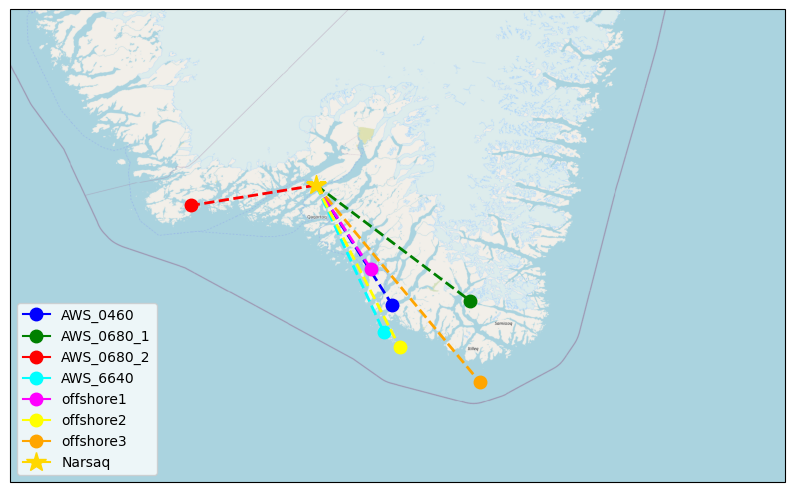

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
from geopy.distance import geodesic
import os

# Define the directory where the CSV files are stored
input_dir = '../../data/wind'

# Narsaq coordinates
narsaq_coords = (60.9167, -46.0500)  # (latitude, longitude)

# Initialize an empty DataFrame to hold wind locations from all files
wind_locations = pd.DataFrame(columns=['NAME', 'stLAT', 'stLON'])

# Loop through each file and collect wind location data
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        df = pd.read_csv(file_path)
        # Convert 'stLAT' and 'stLON' to float to avoid any formatting issues
        df['stLAT'] = pd.to_numeric(df['stLAT'], errors='coerce')
        df['stLON'] = pd.to_numeric(df['stLON'], errors='coerce')
        # Selecting the relevant columns based on the provided format
        wind_locations = pd.concat([wind_locations, df[['NAME', 'stLAT', 'stLON']]], ignore_index=True)

# Remove duplicates if any file overlaps in wind plant data
wind_locations.drop_duplicates(inplace=True)

# Initialize a map with the OpenStreetMap tiles
osm_tiles = OSM()
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(1, 1, 1, projection=osm_tiles.crs)
ax.set_extent([-50, -40, 59, 62], crs=ccrs.PlateCarree())  # You might need to adjust this for a better fit
ax.add_image(osm_tiles, 8)  # A higher zoom level for more detail

# Use a different color for each wind location
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange']
color_index = 0
# Plot each wind location with a line to Narsaq and compute the distance
for index, row in wind_locations.iterrows():
    # Ensure that latitude and longitude are floats
    # Skip rows where latitude or longitude are NaN
    if pd.isna(row['stLAT']) or pd.isna(row['stLON']):
        continue
    try:
        lat, lon = float(row['stLAT']), float(row['stLON'])
        color = colors[color_index % len(colors)]  # Cycle through colors
        ax.plot(lon, lat, marker='o', color=color, markersize=9, transform=ccrs.PlateCarree(), label=row['NAME'])
        ax.plot([narsaq_coords[1], lon], [narsaq_coords[0], lat], color=color, linestyle='--', linewidth=2, transform=ccrs.PlateCarree())

        # Compute and print the distance to Narsaq
        distance = geodesic(narsaq_coords, (lat, lon)).kilometers
        print(f"Distance from {row['NAME']} to Narsaq: {distance:.2f} km")
        
        # Increment color index only for valid plots
        color_index += 1
    except ValueError as e:
        print(f"Error plotting {row['NAME']}: {e}")

# Plot Narsaq with a distinct marker
ax.plot(narsaq_coords[1], narsaq_coords[0], marker='*', color='gold', markersize=15, transform=ccrs.PlateCarree(), label='Narsaq')

# Add a legend to the map
plt.legend(loc='lower left')

# Show the map
plt.show()

In [1]:
import pandas as pd

def extract_load_factors_for_years(input_file_path, output_file_path, years=[2015, 2016, 2017, 2018, 2019]):
    # Load the CSV file
    df = pd.read_csv(input_file_path)

    # Ensure accurate construction of the 'DATE' column
    # The following assumes 'YYY', 'MM', 'DD', and 'HH' are correct column names in your CSV
    try:
        df['DATE'] = pd.to_datetime(df[['YYY', 'MM', 'DD', 'HH']].astype(str).agg('-'.join, axis=1) + ':00:00')
    except Exception as e:
        print(f"Error in date parsing: {e}")
        return

    # Filter rows for the specified years using the 'DATE' column without setting it as an index
    df_filtered = df[df['DATE'].dt.year.isin(years)]

    # Assuming 'load_factor' is the correct column name
    load_factors = df_filtered['load_factor']

    # Save the load factors to a new CSV file without headers and index
    load_factors.to_csv(output_file_path, header=False, index=False)

In [2]:
input_file_path = '../../data/wind/load_factor/offshore3_lf.csv'  # Update this to your file's path
output_file_path = '../../data/load_factor_woff_GL.csv'  # The output file path

extract_load_factors_for_years(input_file_path, output_file_path)

input_file_path = '../../data/wind/load_factor/AWS_0680_2_lf.csv'  # Update this to your file's path
output_file_path = '../../data/load_factor_won_GL.csv'  # The output file path

extract_load_factors_for_years(input_file_path, output_file_path)

In [19]:
import pandas as pd
import os

def check_two_years_of_data(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Calculate the number of entries
    num_entries = len(df)

    # Define the expected number of entries for common years and for a leap year + common year
    expected_entries_common_years = 24 * 365 * 2
    expected_entries_leap_and_common = 24 * (365 + 366)

    # Check if the number of entries matches the expected number
    if num_entries == expected_entries_common_years or num_entries == expected_entries_leap_and_common:
        print(f"{os.path.basename(file_path)} contains exactly two years of data ({num_entries} entries).")
    else:
        print(f"{os.path.basename(file_path)} does NOT contain exactly two years of data ({num_entries} entries).")

check_two_years_of_data('../../data/load_factor_won_GL.csv')
check_two_years_of_data('../../data/load_factor_woff_GL.csv')
check_two_years_of_data(r'C:\Users\gille\OneDrive\Documents\Travail\HEC-University\Master_2\Master Thesis\Code\Victor\data\load_factor_woff_GL.csv')

load_factor_won_GL.csv does NOT contain exactly two years of data (17543 entries).
load_factor_woff_GL.csv does NOT contain exactly two years of data (17543 entries).
load_factor_woff_GL.csv does NOT contain exactly two years of data (26279 entries).


# SOLAR AND WIND for Spain and Germany

In [3]:
import pandas as pd

# File paths
files = {
    "ninja_pv_country_ES_merra-2_corrected.csv": "pv_capacity_factors_ES.csv",
    "ninja_pv_country_DE_merra-2_corrected.csv": "pv_capacity_factors_DE.csv",
    "ninja_wind_country_DE_current-merra-2_corrected.csv": "wind_capacity_factors_DE.csv",
    "ninja_wind_country_ES_current-merra-2_corrected.csv": "wind_capacity_factors_ES.csv"
}

# Process each file
for input_file, output_file in files.items():
    # Load the CSV file
    df = pd.read_csv(f'../../data/wind/load_factor/{input_file}')
    
    df['time'] = pd.to_datetime(df['time'])
    df_filtered = df[df['time'].dt.year.between(2015, 2019)]    # Select the appropriate column and remove header
    
    if 'wind_country_DE' in input_file:
        values = df['onshore'].to_numpy()
    else:
        values = df['national'].to_numpy()
    
    # Save to new CSV without index and header
    pd.DataFrame(values).to_csv(f'../../data/{output_file}', index=False, header=False)

# List of output files
output_files = list(files.values())
output_files


['pv_capacity_factors_ES.csv',
 'pv_capacity_factors_DE.csv',
 'wind_capacity_factors_DE.csv',
 'wind_capacity_factors_ES.csv']

            onshore      offshore
count  43824.000000  43824.000000
mean       0.533469      0.577646
std        0.417560      0.421190
min        0.000000      0.000000
25%        0.071367      0.091801
50%        0.551951      0.705299
75%        0.999826      0.999998
max        1.000000      1.000000


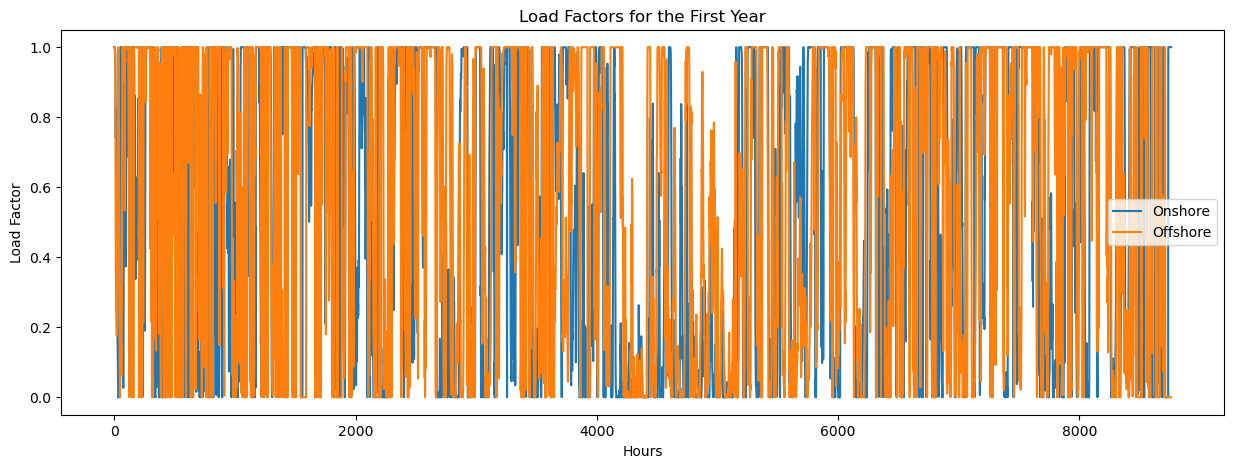

Pearson correlation coefficient: 0.1768986304358669, p-value: 6.227845259861513e-305


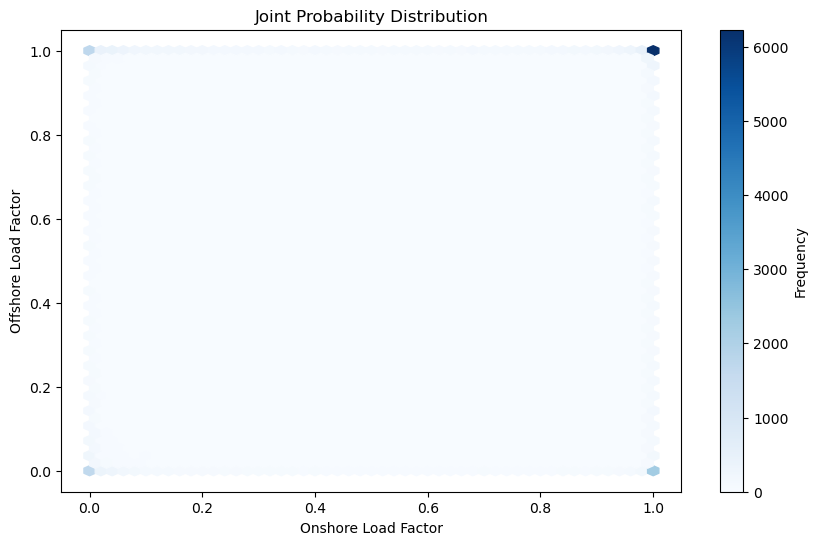

Complementarity Index: -2732.5180925924224


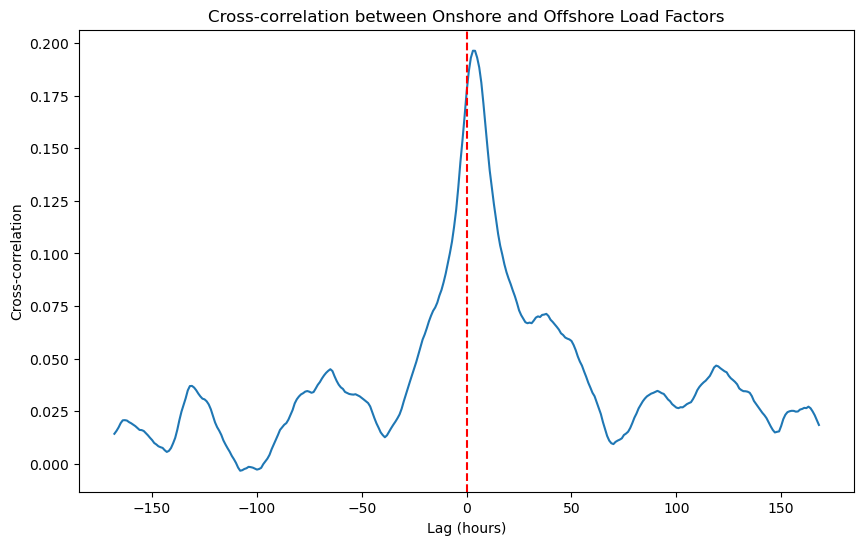

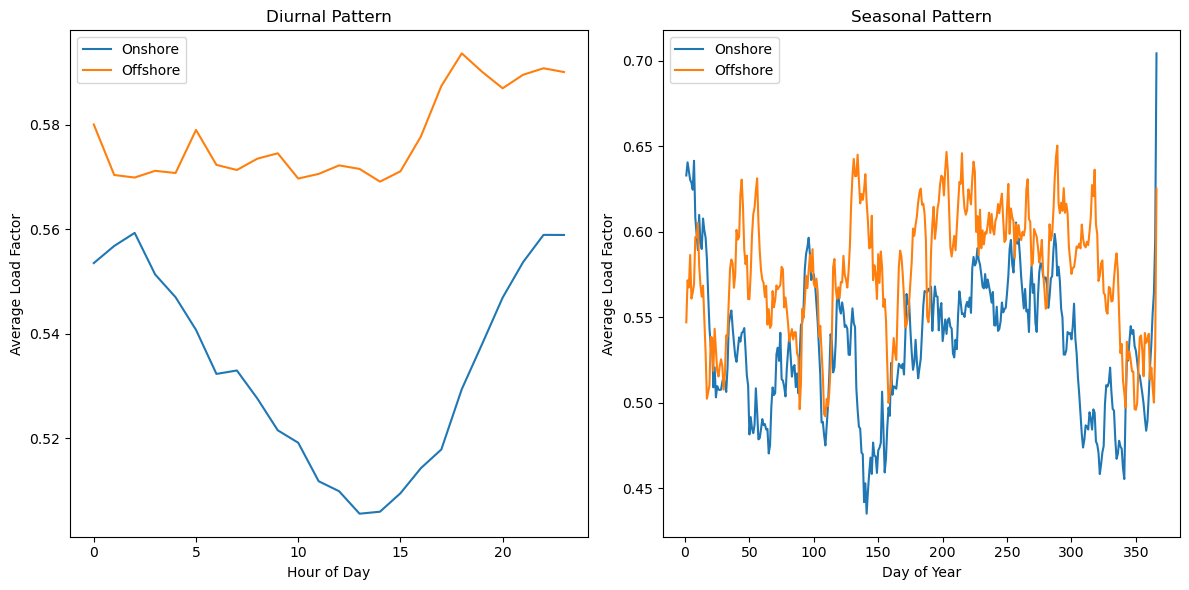

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the data
onshore_data = pd.read_csv('../../data/load_factor_won_GL.csv', header=None, names=['onshore'])
offshore_data = pd.read_csv('../../data/load_factor_woff_GL.csv', header=None, names=['offshore'])

# Ensure data is aligned (both should have the same length)
assert len(onshore_data) == len(offshore_data), "Data length mismatch"

# Combine data into a single DataFrame
data = pd.concat([onshore_data, offshore_data], axis=1)

# Descriptive statistics
print(data.describe())

# Plot time series for a subset (e.g., first year)
plt.figure(figsize=(15, 5))
plt.plot(data['onshore'][:8760], label='Onshore')  # 8760 hours in a year
plt.plot(data['offshore'][:8760], label='Offshore')
plt.legend()
plt.title('Load Factors for the First Year')
plt.xlabel('Hours')
plt.ylabel('Load Factor')
plt.show()

# Correlation analysis
correlation, p_value = pearsonr(data['onshore'], data['offshore'])
print(f'Pearson correlation coefficient: {correlation}, p-value: {p_value}')

# Joint probability distribution
plt.figure(figsize=(10, 6))
plt.hexbin(data['onshore'], data['offshore'], gridsize=50, cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Onshore Load Factor')
plt.ylabel('Offshore Load Factor')
plt.title('Joint Probability Distribution')
plt.show()

# Complementarity Index calculation
onshore_mean = data['onshore'].mean()
offshore_mean = data['offshore'].mean()
ci = np.sum(np.minimum(0, (data['onshore'] - onshore_mean) * (data['offshore'] - offshore_mean)))
print(f'Complementarity Index: {ci}')

# Time Lag Analysis
# Calculating cross-correlation for different lags
lags = range(-24*7, 24*7 + 1)  # lags from -1 week to +1 week
cross_correlation = [data['onshore'].shift(lag).corr(data['offshore']) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, cross_correlation)
plt.xlabel('Lag (hours)')
plt.ylabel('Cross-correlation')
plt.title('Cross-correlation between Onshore and Offshore Load Factors')
plt.axvline(x=0, color='red', linestyle='--')  # Mark zero lag
plt.show()

# Seasonal and Diurnal Analysis
total_hours = len(data)

# Create hour column (0-23)
data['hour'] = np.tile(np.arange(24), total_hours // 24 + 1)[:total_hours]

# Create dayofyear column (1-365 or 1-366 for leap years)
years = total_hours // (24 * 365)  # This will give the approximate number of years
leap_years = (years + 1) // 4  # Account for leap years

# Create an array that repeats days of the year appropriately considering leap years
dayofyear = []
for year in range(years):
    days_in_year = 366 if (2015 + year) % 4 == 0 else 365
    dayofyear.extend(np.tile(np.arange(1, days_in_year + 1), 24))
dayofyear = np.array(dayofyear)

# If there are remaining hours that don't complete a year, add them
remaining_hours = total_hours - len(dayofyear)
if remaining_hours > 0:
    remaining_days = (remaining_hours // 24) + 1
    dayofyear = np.append(dayofyear, np.tile(np.arange(1, remaining_days + 1), 24)[:remaining_hours])

data['dayofyear'] = dayofyear[:total_hours]

diurnal_pattern = data.groupby('hour').mean()
seasonal_pattern = data.groupby('dayofyear').mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(diurnal_pattern['onshore'], label='Onshore')
plt.plot(diurnal_pattern['offshore'], label='Offshore')
plt.legend()
plt.title('Diurnal Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load Factor')

plt.subplot(1, 2, 2)
plt.plot(seasonal_pattern['onshore'], label='Onshore')
plt.plot(seasonal_pattern['offshore'], label='Offshore')
plt.legend()
plt.title('Seasonal Pattern')
plt.xlabel('Day of Year')
plt.ylabel('Average Load Factor')

plt.tight_layout()
plt.show()

C:\Users\gille\AppData\Local\Temp\ipykernel_5048\488190226.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diurnal_pattern = data.groupby('hour').mean()
C:\Users\gille\AppData\Local\Temp\ipykernel_5048\488190226.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_pattern = data.groupby('dayofyear').mean()


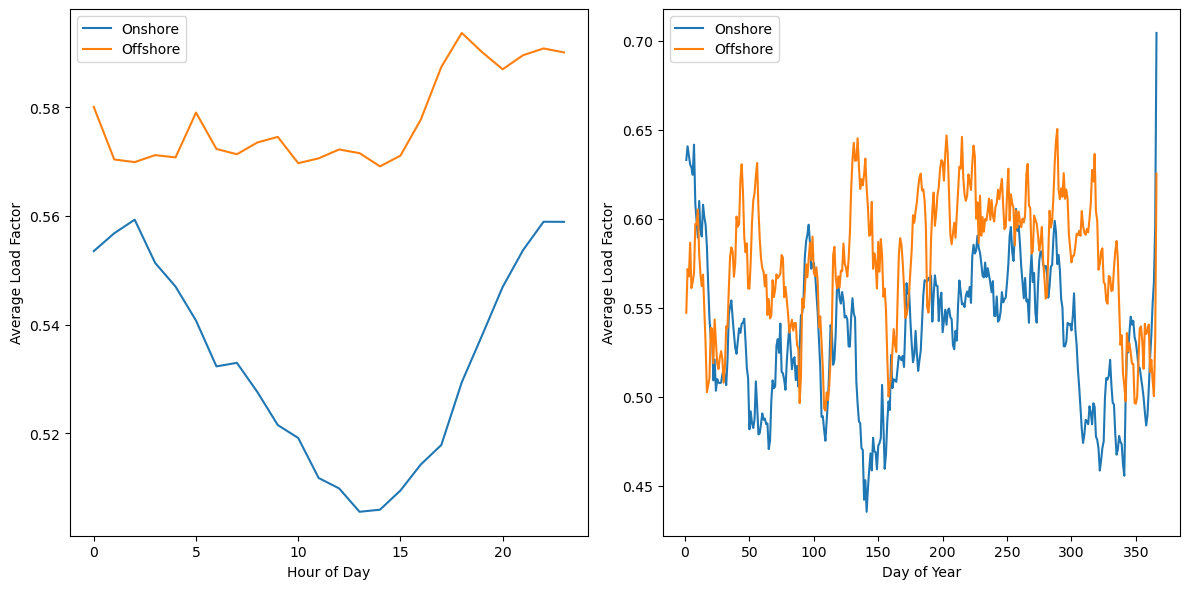

In [20]:
# Seasonal and Diurnal Analysis
total_hours = len(data)

# Create hour column (0-23)
data['hour'] = np.tile(np.arange(24), total_hours // 24 + 1)[:total_hours]

# Create dayofyear column (1-365 or 1-366 for leap years)
years = total_hours // (24 * 365)  # This will give the approximate number of years
leap_years = (years + 1) // 4  # Account for leap years

# Create an array that repeats days of the year appropriately considering leap years
dayofyear = []
for year in range(years):
    days_in_year = 366 if (2015 + year) % 4 == 0 else 365
    dayofyear.extend(np.tile(np.arange(1, days_in_year + 1), 24))
dayofyear = np.array(dayofyear)

# If there are remaining hours that don't complete a year, add them
remaining_hours = total_hours - len(dayofyear)
if remaining_hours > 0:
    remaining_days = (remaining_hours // 24) + 1
    dayofyear = np.append(dayofyear, np.tile(np.arange(1, remaining_days + 1), 24)[:remaining_hours])

data['dayofyear'] = dayofyear[:total_hours]

diurnal_pattern = data.groupby('hour').mean()
seasonal_pattern = data.groupby('dayofyear').mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(diurnal_pattern['onshore'], label='Onshore')
plt.plot(diurnal_pattern['offshore'], label='Offshore')
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Average Load Factor')

plt.subplot(1, 2, 2)
plt.plot(seasonal_pattern['onshore'], label='Onshore')
plt.plot(seasonal_pattern['offshore'], label='Offshore')
plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Average Load Factor')

plt.tight_layout()
plt.savefig('../results/diurnal_seasonal_wind.pdf')
plt.show()
